# Feature Engineering

In this section, we will apply some feature engineering techniques to improve the dataset's usability and try to improve the model's performance. By transforming variables, such as creating categories or simplifying values, we aim to enhance interpretability, address imbalances, and potentially improve our predictive power. These changes may influence the model's outcomes, making this process a crucial step in the analysis. In this stage we will be applying the following techniques:

- Data Cleaning
- Feature Transformation
- Feature Encoding
- Feature Scaling






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

### DATA CLEANING

In [2]:
df= pd.read_csv(r'src/rawDataset.csv')
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [3]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

df.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

No duplicated rows found in the dataset.


**RESULT:**

As shown, our dataset seems to be complete and reliable. There are no missing values, ensuring every column is fully populated, and there are no duplicate records, which maintains the accuracy of our analysis. 

### FEATURE TRANSFORMATION


We have decided to transform the Age column into a categorical variable because its distribution does not appear to be normal. This could be due to the presence of outliers, which can significantly affect the distribution's shape and make it look skewed. By categorizing the Age column (Like this: <30, '30-40', '40-50', '50-60', '>60'), we can mitigate the influence of these outliers and make the data more suitable for modeling.

In [4]:
dfFeature= df

bins = [0, 30, 40, 50, 60, 100]  
labels = ['<30', '30-40', '40-50', '50-60', '>60']

dfFeature['Age'] = pd.cut(dfFeature['Age'], bins=bins, labels=labels, right=False)
dfFeature.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,40-50,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,40-50,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,40-50,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,30-40,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,40-50,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**EXPLANATION:**

We have also decided to transform NumOfProducts column as it only has 4.3% of the values corresponding to a value higher than 2. Simplifying it to a binary variable (Like this: "more than one product: yes/no") could improve interpretability and address potential class imbalance, making the data more manageable for analysis.

In [5]:
dfFeature['NumOfProducts'] = np.where(dfFeature['NumOfProducts'] > 1, 1, 0)
dfFeature.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,40-50,2,0.00,0,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,40-50,1,83807.86,0,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,40-50,8,159660.80,1,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,30-40,1,0.00,1,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,40-50,2,125510.82,0,1,1,79084.10,0,0,5,GOLD,425


### FEATURE ENCODING

**EXPLANATION:**

Now we will split our categorical columns including the new Age column. We will be using OneHotEncoder for having the categorical columns as separate binary columns.

In [6]:
encoder = OneHotEncoder(sparse_output=False, dtype=int)
catcols = ['Gender','Geography', 'Card Type', 'Age']
encData = encoder.fit_transform(dfFeature[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
dfFeature = pd.concat([dfFeature.drop(columns= catcols),encDF],axis=1)

dfFeature.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,...,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age_30-40,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,2,0.00,0,1,1,101348.88,1,1,2,...,0,1,0,0,0,0,1,0,0,0
1,608,1,83807.86,0,0,1,112542.58,0,1,3,...,1,1,0,0,0,0,1,0,0,0
2,502,8,159660.80,1,1,0,113931.57,1,1,3,...,0,1,0,0,0,0,1,0,0,0
3,699,1,0.00,1,0,0,93826.63,0,0,5,...,0,0,1,0,0,1,0,0,0,0
4,850,2,125510.82,0,1,1,79084.10,0,0,5,...,1,0,1,0,0,0,1,0,0,0


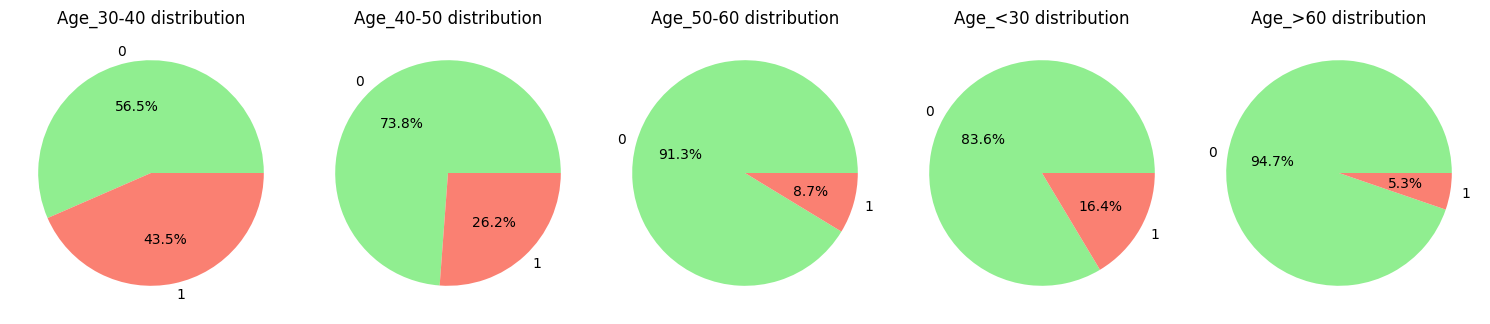

In [7]:
ageCols = dfFeature.filter(like='Age', axis=1)
plt.figure(figsize=(15, 10))  
for i, column in enumerate(ageCols, 1):
    plt.subplot(2, 5, i)  
    dfFeature[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
    plt.title(f'{column} distribution')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

As we can see, now we have 5 new columns. The range in which the client is its no explained by a 1 in the corresponding age column.

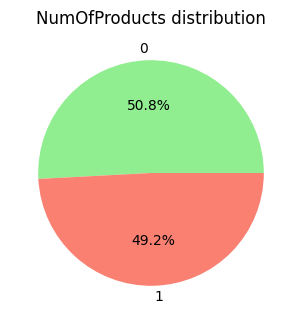

In [8]:
column = 'NumOfProducts'
plt.figure(figsize=(15, 10))
plt.subplot(2, 5, i)  
dfFeature[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title(f'{column} distribution')
plt.ylabel('') 
plt.tight_layout()
plt.show()

We can observe how now we only have binary values, which might help our model to make better predictions. As there are not small categories that could harm the performance.

# Feature Selection

Previous Explanation:

For feature selection we have been researching on different methods, we have chosen 2: filther method, Wrapped method. Our purpose for each of then is to find which selects the best features for our models, a brief explanation about each of them could be:

- Filther Methods: Are statistical feature selection techniques to find more relevant features on a dataset without using any prediction model, depending on the input variables we are applying:

    -   Chi-square: This method is used to determine the independence of two categorical variables. Then its ideal in our case for columns like: Gender, Geography,...

    -   Anova test: As it uses means from numeric features between categorical groups defined by the target variable. Its ideal for example for Balance and Credit Score columns

- Wrapped Methods:

### FILTHER METHODS

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif

In [10]:

numerical_cols = [
    'CreditScore', 'Tenure', 'Balance',
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]
categorical_cols = [
    'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Complain', 'Gender_Female', 'Gender_Male',
    'Geography_France', 'Geography_Germany', 'Geography_Spain',
    'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
    'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_<30', 'Age_>60', 'Exited'
]
dfFeature[categorical_cols] = dfFeature[categorical_cols].astype('category')
dfFeature[numerical_cols] = dfFeature[numerical_cols].apply(pd.to_numeric)
print(dfFeature.dtypes)


CreditScore              int64
Tenure                   int64
Balance                float64
NumOfProducts         category
HasCrCard             category
IsActiveMember        category
EstimatedSalary        float64
Exited                category
Complain              category
Satisfaction Score       int64
Point Earned             int64
Gender_Female         category
Gender_Male           category
Geography_France      category
Geography_Germany     category
Geography_Spain       category
Card Type_DIAMOND     category
Card Type_GOLD        category
Card Type_PLATINUM    category
Card Type_SILVER      category
Age_30-40             category
Age_40-50             category
Age_50-60             category
Age_<30               category
Age_>60               category
dtype: object


In [11]:
dfFeature['Exited'] = dfFeature['Exited'].astype('category')
cats = dfFeature.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

if not cats.empty:
        chi2Score, chi2Val = chi2(dfFeature[cats], le.fit_transform(dfFeature['Exited']))
        chi2Results = pd.DataFrame({'Feature': dfFeature[cats].columns, 'Chi2 Score': chi2Score, 'p-Value': chi2Val})
        chi2Sel = chi2Results[chi2Results['p-Value'] < 0.05]
        print("Características categóricas seleccionadas:")
        print(chi2Sel)


Características categóricas seleccionadas:
              Feature   Chi2 Score        p-Value
0       NumOfProducts   174.301778   8.505154e-40
2      IsActiveMember   118.543911   1.318038e-27
3              Exited  7962.000000   0.000000e+00
4            Complain  7887.606705   0.000000e+00
5       Gender_Female    61.623587   4.158076e-15
6         Gender_Male    51.302173   7.918794e-13
7    Geography_France    54.644909   1.443979e-13
8   Geography_Germany   225.008895   7.309210e-51
9     Geography_Spain    20.972597   4.658998e-06
14          Age_30-40   241.537191   1.817748e-54
15          Age_40-50   176.021186   3.582693e-40
16          Age_50-60   681.068598  3.913292e-150
17            Age_<30   166.304621   4.745970e-38
18            Age_>60    18.560097   1.646309e-05


**Results:**

Chi-square test revealed several significant categorical features that are strongly related to the target variable Exited(wheter a customer left the bank). Features like NumOfProducts, IsActiveMember, Complain, and demographics such as Gender and Geography show strong relationships with the likelihood of customer churn. All features have p-values below 0.05, indicating statistical significance.

In [12]:
nums = dfFeature.select_dtypes(include=['float64', 'int64']).columns

if not nums.empty:
        annScore, annPVal = f_classif(dfFeature[nums], le.fit_transform(dfFeature['Exited']))
        annResults = pd.DataFrame({'Feature': nums, 'F-Score': annScore, 'p-Value': annPVal})
        annSel = annResults[annResults['p-Value'] < 0.05]
        print(annSel)

       Feature     F-Score       p-Value
0  CreditScore    7.170810  7.422037e-03
2      Balance  142.581456  1.209208e-32


In [13]:
selectedFeatures = list(annSel['Feature'])+list(chi2Sel['Feature']) 
print(selectedFeatures)

dfFSel = dfFeature[selectedFeatures]
dfFSel.head()

['CreditScore', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Exited', 'Complain', 'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_<30', 'Age_>60']


,CreditScore,Balance,NumOfProducts,IsActiveMember,Exited,Complain,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Age_30-40,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,0.00,0,1,1,1,1,0,1,0,0,0,1,0,0,0
1,608,83807.86,0,1,0,1,1,0,0,0,1,0,1,0,0,0
2,502,159660.80,1,0,1,1,1,0,1,0,0,0,1,0,0,0
3,699,0.00,1,0,0,0,1,0,1,0,0,1,0,0,0,0
4,850,125510.82,0,1,0,0,1,0,0,0,1,0,1,0,0,0


# Classification

After selecting the most important features by feature selection we are going to begin with classification. We will be training our models for which **EXITED**  is going to be our target as our main task is to predict if a client wil leave or not a Bank. We will be using the following algorithms:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)

In [14]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


c:\Users\dekum\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Logistic Regression

In [15]:
X = dfFeature[selectedFeatures].drop(['Exited','Complain'], axis=1)
y = dfFeature['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear", "saga","sag"])
    C = trial.suggest_float("C", 1e-6, 1e2, log =True)
    max_iter = trial.suggest_int('max_iter', 100, 5000)
    model = LogisticRegression(
        solver=solver,
        C=C,
        random_state=42,
        class_weight='balanced',
        max_iter= max_iter
    )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=500, n_jobs=-1)
print("Best hyperparameters:", study.best_params)

[I 2024-12-21 13:18:11,377] A new study created in memory with name: no-name-1fe6fa9d-cdf3-4014-9e3a-fbe774d9bba4
[I 2024-12-21 13:18:13,433] Trial 10 finished with value: 0.7967326713601911 and parameters: {'solver': 'lbfgs', 'C': 0.25681323809651, 'max_iter': 3300}. Best is trial 10 with value: 0.7967326713601911.
[I 2024-12-21 13:18:13,460] Trial 1 finished with value: 0.7967273742909151 and parameters: {'solver': 'lbfgs', 'C': 6.942458211956853, 'max_iter': 1257}. Best is trial 10 with value: 0.7967326713601911.
[I 2024-12-21 13:18:13,506] Trial 9 finished with value: 0.7926081806011691 and parameters: {'solver': 'saga', 'C': 0.00016344073953116728, 'max_iter': 2873}. Best is trial 10 with value: 0.7967326713601911.
[I 2024-12-21 13:18:13,552] Trial 5 finished with value: 0.7887663607207867 and parameters: {'solver': 'saga', 'C': 5.3557035428166e-06, 'max_iter': 877}. Best is trial 10 with value: 0.7967326713601911.
[I 2024-12-21 13:18:13,561] Trial 4 finished with value: 0.7909511

Best hyperparameters: {'solver': 'liblinear', 'C': 0.005824247134071407, 'max_iter': 4988}


In [17]:
best_params = study.best_params
best_model = LogisticRegression(**best_params, class_weight='balanced', random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]


### MODEL EVALUATION

Accuracy: 0.7255
Precision: 0.4041
Recall: 0.7279
F1 Score: 0.5197
ROC AUC Score: 0.8106
Error Rate: 0.2745


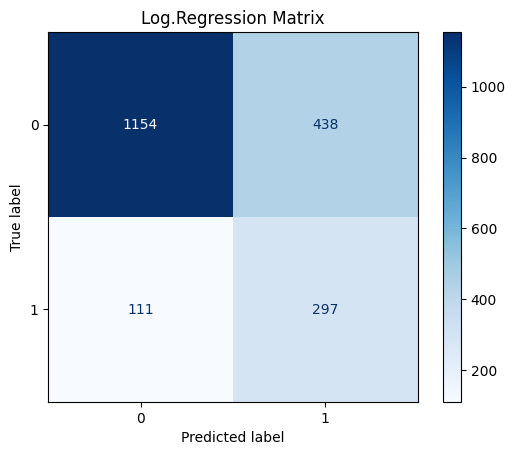

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Log.Regression Matrix")
plt.show()

## RANDOMFOREST

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight="balanced", 
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

[I 2024-12-21 13:18:30,627] A new study created in memory with name: no-name-b30203f2-1b2d-470a-a292-6a4730c82356
[I 2024-12-21 13:18:32,286] Trial 0 finished with value: 0.7897398175881962 and parameters: {'n_estimators': 184, 'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7897398175881962.
[I 2024-12-21 13:18:33,396] Trial 2 finished with value: 0.804389825774576 and parameters: {'n_estimators': 162, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 2 with value: 0.804389825774576.
[I 2024-12-21 13:18:38,912] Trial 6 finished with value: 0.8135655536400497 and parameters: {'n_estimators': 507, 'max_depth': 45, 'min_samples_split': 9, 'min_samples_leaf': 28, 'max_features': None}. Best is trial 6 with value: 0.8135655536400497.
[I 2024-12-21 13:18:39,028] Trial 1 finished with value: 0.8115372576590808 and parameters: {'n_estimators': 470, 'max_depth': 44, 'min_s

Best hyperparameters: {'n_estimators': 422, 'max_depth': 6, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': None}


In [21]:
best_params =study.best_params
best_model = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


### MODEL EVALUATION

Accuracy: 0.7620
Precision: 0.4459
Recall: 0.6863
F1 Score: 0.5405
ROC AUC Score: 0.8252
Error Rate: 0.2380


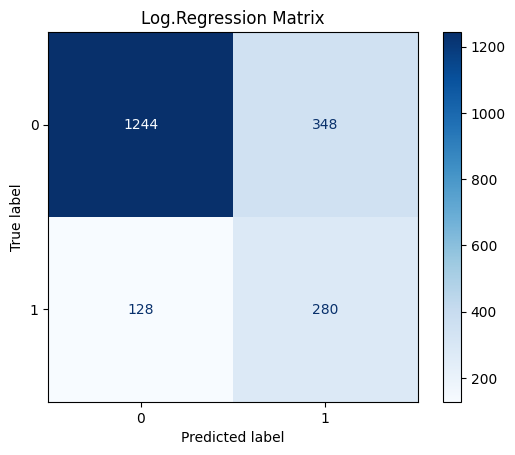

In [22]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Log.Regression Matrix")
plt.show()

EXPLICAR: 
- STRATIFIED K-FOLD
- HIPERPARAMETROS
- RESULTADOS + MATRIZ
- MÉTRICAS QUE HEMOS USADO Y PORQUÉ
- PORQUE ALGUNOS ALGORITMOS DAN MEJORES RESULTADOS QUE OTROS

## SUPPORT VECTOR MACHINES (SVM)

In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    C = trial.suggest_float("C", 1e-3, 1e2, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    degree = trial.suggest_int("degree", 2, 5) if kernel == "poly" else 3
    
    model = SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        degree=degree,
        probability=True,
        random_state=42,
        class_weight="balanced"
    )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15, n_jobs=-1)

print("Mejores hiperparámetros:", study.best_params)




[I 2024-12-21 13:19:57,972] A new study created in memory with name: no-name-6a9c345b-8a33-4ebb-802a-59e6eb0cd28b


[I 2024-12-21 13:20:06,343] Trial 1 finished with value: 0.592375 and parameters: {'C': 1.0383364746236476, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 1 with value: 0.592375.
[I 2024-12-21 13:20:27,526] Trial 0 finished with value: 0.7470000000000001 and parameters: {'C': 0.4303091072914316, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.7470000000000001.
[I 2024-12-21 13:20:33,424] Trial 3 finished with value: 0.738875 and parameters: {'C': 18.45357900072881, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.7470000000000001.
[I 2024-12-21 13:20:54,698] Trial 2 finished with value: 0.7715 and parameters: {'C': 0.0021746393520862936, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 2 with value: 0.7715.
[I 2024-12-21 13:20:57,108] Trial 7 finished with value: 0.651375 and parameters: {'C': 14.949642981667989, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 2 with value: 0.7715.
[I 2024-12-21 13:20:57,918] Trial 5 finishe

Mejores hiperparámetros: {'C': 0.0021746393520862936, 'kernel': 'rbf', 'gamma': 'scale'}


In [24]:
best_params = study.best_params
best_model = SVC(**best_params,class_weight='balanced', random_state=42 ,probability=True)

best_model.fit(X_train_scaled,y_train )

y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]



### MODEL EVALUATION

Accuracy: 0.7165
Precision: 0.3969
Recall: 0.7500
F1 Score: 0.5191
ROC AUC Score: 0.7876
Error Rate: 0.2835


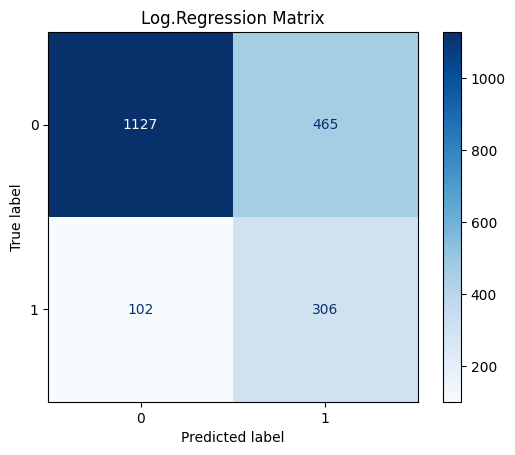

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Log.Regression Matrix")
plt.show()

## NAIVE BAYES

In [26]:
scaler = StandardScaler()
xStandard = scaler.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(xStandard, y, test_size = 0.2, random_state = 0)
model = GaussianNB()

model.fit(X_train, y_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.7925
Precision: 0.4890
Recall: 0.5481
F1 Score: 0.5169
ROC AUC Score: 0.7852
Error Rate: 0.2075


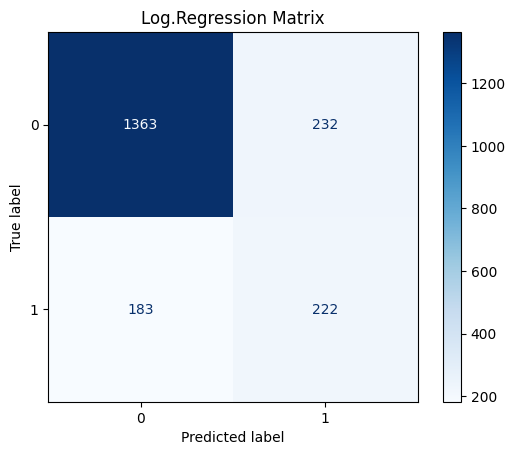

In [27]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
    "Error Rate": 1-accuracy,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Log.Regression Matrix")
plt.show()

## CART

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        class_weight="balanced", 
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best hyperparameters:", study.best_params)

[I 2024-12-21 13:21:32,903] A new study created in memory with name: no-name-caa0d7f0-2a35-43f1-a0db-7829b8682ee6
[I 2024-12-21 13:21:32,979] Trial 1 finished with value: 0.7793927150850901 and parameters: {'n_estimators': 237, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 21, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7793927150850901.
[I 2024-12-21 13:21:33,008] Trial 0 finished with value: 0.7246807311881809 and parameters: {'n_estimators': 434, 'max_depth': 34, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 1 with value: 0.7793927150850901.
[I 2024-12-21 13:21:33,022] Trial 3 finished with value: 0.7361888549662432 and parameters: {'n_estimators': 119, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 1 with value: 0.7793927150850901.
[I 2024-12-21 13:21:33,078] Trial 6 finished with value: 0.7795371806108002 and parameters: {'n_estimators': 167, 'max_depth': 38, 'min

Best hyperparameters: {'n_estimators': 204, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 30, 'max_features': 'log2'}
